In [95]:
import re
import pandas as pd

In [96]:
step = re.compile("step\s\d+\slr")
lr = re.compile("lr\s\d+\sstep-time")
step_time = re.compile("step-time\s\d+.\d+")
wps = re.compile("wps\s\d+.\d+")
ppl = re.compile("ppl\s\d+.\d+\sgN")
gN = re.compile("gN\s\d+.\d+\s")
bleu = re.compile("bleu\s\d+.\d+,\sT")

In [97]:
textfile = open("lstm-training.txt", 'r')
filetext = textfile.read()
textfile.close()
step = re.findall(step, filetext)
lr = re.findall(lr, filetext)
step_time = re.findall(step_time, filetext)
wps = re.findall(wps, filetext)
ppl = re.findall(ppl, filetext)
gN = re.findall(gN, filetext)
bleu = re.findall(bleu, filetext)

In [98]:
print(len(step), len(lr), len(step_time), len(wps), len(ppl), len(gN), len(bleu))

122 122 122 122 122 122 122


In [99]:
for i in range(122):
  step[i] = step[i][4:-2].strip()
  lr[i] = lr[i][3]
  step_time[i] = step_time[i][9:]
  wps[i] = wps[i][4:]
  ppl[i] = ppl[i][4:-2]
  gN[i] = gN[i][3:].strip()
  bleu[i] = bleu[i][5:-3]

In [100]:
d = {'step': step, 'lr': lr, 'step-time': step_time, 'wps': wps, 'ppl': ppl, 'gN': gN, 'bleu': bleu}
df = pd.DataFrame(data=d)
df

,step,lr,step-time,wps,ppl,gN,bleu
0,100,1,1.30,4.30,1965.95,16.09,0.00
1,200,1,1.06,5.33,504.30,5.80,0.00
2,300,1,1.05,5.32,329.94,4.43,0.00
3,400,1,1.06,5.29,252.88,3.81,0.00
4,500,1,1.06,5.30,220.19,3.72,0.00
...,...,...,...,...,...,...,...
117,11800,1,1.07,5.27,33.98,3.15,6.10
118,11900,1,1.06,5.28,33.97,3.18,6.10
119,12000,1,1.28,4.32,33.49,3.10,6.10
120,12000,1,1.28,4.32,33.49,3.10,5.1


In [103]:
complete = df.apply(pd.to_numeric, errors = 'coerce')

In [104]:
complete

,step,lr,step-time,wps,ppl,gN,bleu
0,100,1,1.30,4.30,1965.95,16.09,0.0
1,200,1,1.06,5.33,504.30,5.80,0.0
2,300,1,1.05,5.32,329.94,4.43,0.0
3,400,1,1.06,5.29,252.88,3.81,0.0
4,500,1,1.06,5.30,220.19,3.72,0.0
...,...,...,...,...,...,...,...
117,11800,1,1.07,5.27,33.98,3.15,6.1
118,11900,1,1.06,5.28,33.97,3.18,6.1
119,12000,1,1.28,4.32,33.49,3.10,6.1
120,12000,1,1.28,4.32,33.49,3.10,5.1


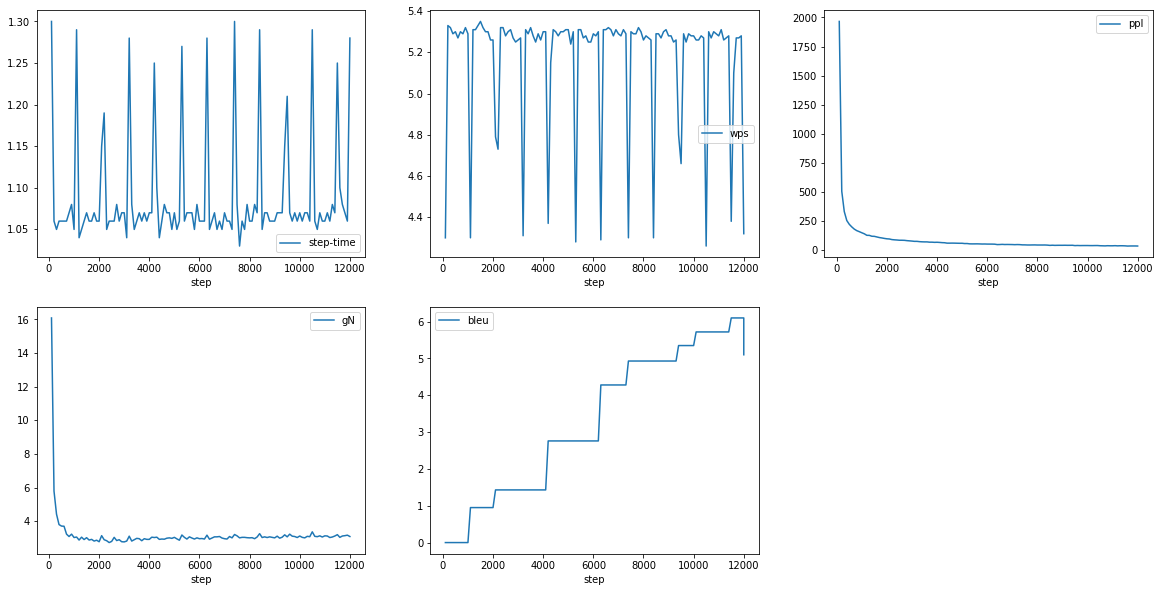

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3,figsize=(20,10))

complete.plot(x='step', y='step-time', ax=ax[0,0])
complete.plot(x='step', y='wps', ax=ax[0,1])
complete.plot(x='step', y='ppl', ax=ax[0,2])
complete.plot(x='step', y='gN', ax=ax[1,0])
complete.plot(x='step', y='bleu', ax=ax[1,1])

# ax[0,0].plot(complete['step'], complete['step-time'],)
# ax[0,1].plot(complete['step'], complete['wps'])
# ax[0,2].plot(complete['step'], complete['ppl'])
# ax[1,0].plot(complete['step'], complete['gN'])
# ax[1,1].plot(complete['step'], complete['bleu'])
fig.delaxes(ax[1][2])

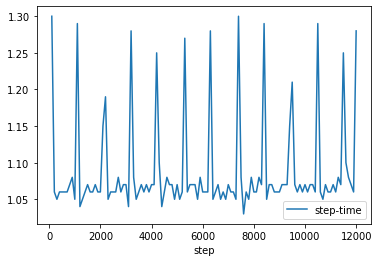

In [107]:
complete.plot(x='step', y='step-time')

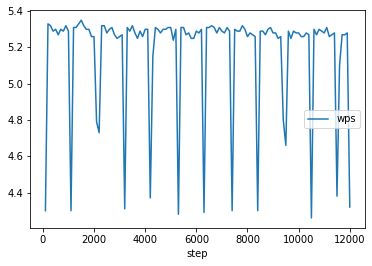

In [108]:
complete.plot(x='step', y='wps')

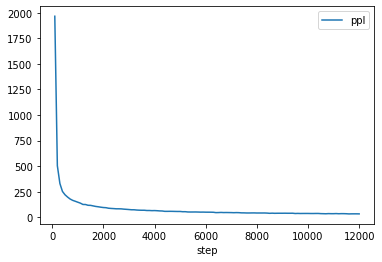

In [111]:
complete.plot(x='step', y='ppl')

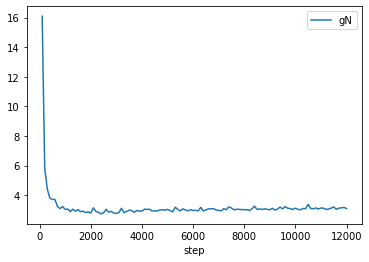

In [112]:
complete.plot(x='step', y='gN')

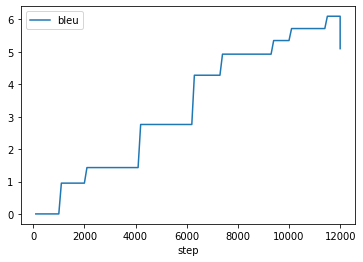

In [113]:
complete.plot(x='step', y='bleu')